Charlie Boye

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [24]:
import pandas as pd
import numpy as np
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns

# Needed to add these imports (not sure why because I already added sklearn but gave me errors otherwise)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [25]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [26]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


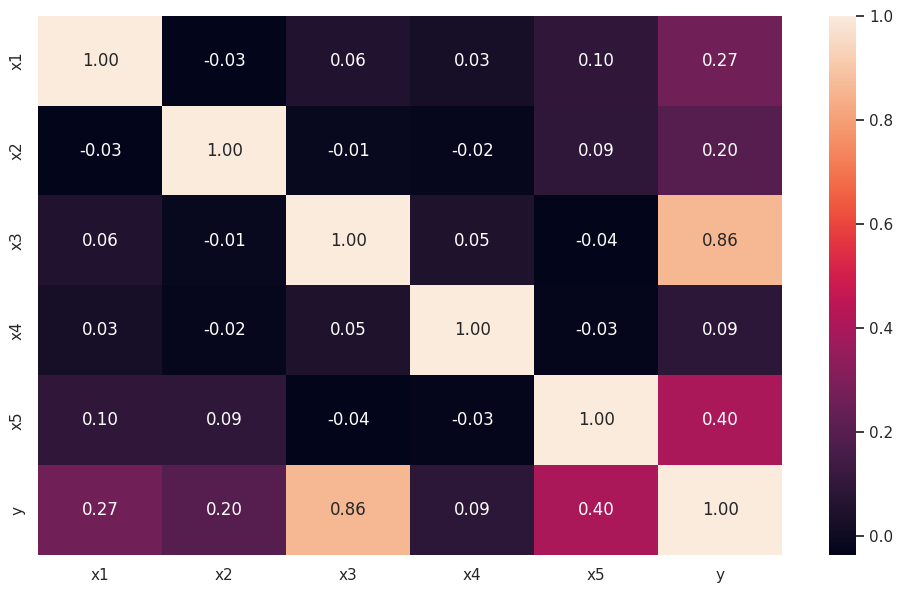

In [27]:
corr = reg_df.corr()
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.show()

In [28]:
feature_idx = [2, 4]
Z = X[:, feature_idx]
Z_names = [column_names[idx] for idx in feature_idx]
Z_names
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2)

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

R2_train = model_LR.score(Z_train, y_train)
R2_test = model_LR.score(Z_test, y_test)
y_pred = model_LR.predict(Z_test)
mse = mean_squared_error(y_test, y_pred)

print(f'R2_train = {R2_train:.2f}')
print(f'R2_test = {R2_test:.2f}')
print(f'MSE = {mse:.2f}')

R2_train = 0.93
R2_test = 0.92
MSE = 1104.66


#### Your written answers here

What are your model parameters?
 - x3 and x5

What were your MSE and R^2?
 - R2_train = 0.93
 - R2_test = 0.92
 - MSE = 1104.66 



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [29]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


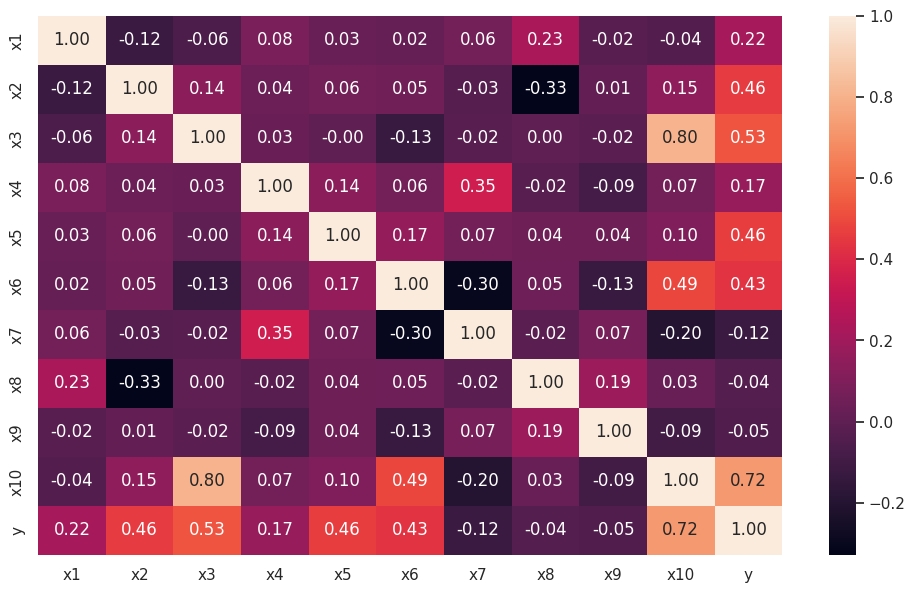

In [30]:
corr = reg2_df.corr()
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.show()

In [31]:
candidate_idx = [0, 1, 2, 3, 4, 5, 6, 7]

Z = X[:, candidate_idx]
Z_names = [column_names[idx] for idx in candidate_idx]
Z_names
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2)  

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

R2_train = model_LR.score(Z_train, y_train)
R2_test = model_LR.score(Z_test, y_test)

y_pred = model_LR.predict(Z_test)
mse = mean_squared_error(y_test, y_pred)

print(f'R2_train = {R2_train:.2f}')
print(f'R2_test = {R2_test:.2f}')
print(f'MSE = {mse:.2f}')

R2_train = 0.87
R2_test = 0.89
MSE = 7.74


In [32]:
print_model(bias, coef, column_names, model_name = 'True Model')
print_model(model_LR.intercept_, model_LR.coef_, Z_names, model_name = 'Fit Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6
Fit Model:
 y = -15.38 + 59.26*x1 + 75.73*x2 + 103.93*x3 + 13.53*x4 + 56.54*x5 + 74.19*x6 + -8.80*x7 + -1.80*x8


#### Your written answers here

What are your model parameters?
 - The printed intercept/coefficients show how each feature contributes to the predicted y (I am using default hyper-parameters)

Which features (x1, x2...) were significant? Which were co-linear?
 - I found that the features x2, x3, x5, and x6 were moderately correlated to y.
    - I added x1 and x4 because they also boosted my R2
 - x10 was stronly correlated to y but was colinear with x3 and x6
 
What were your MSE and R^2?
 - 



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

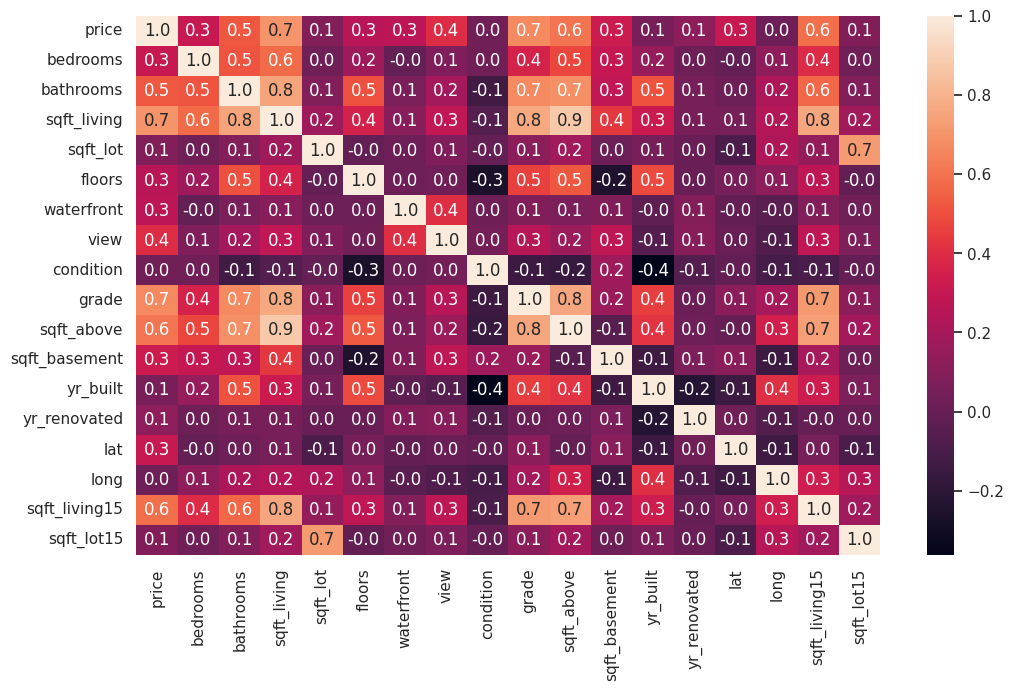

In [33]:
housing_df = pd.read_csv('kc_house_data.csv')

housing_df.drop(columns = ['id', 'date', 'zipcode'], inplace = True)
sns.set_theme(rc={'figure.figsize':(12,7)})
sns.heatmap(housing_df.corr(), annot = True, fmt = '.1f')
plt.show()

### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
    - The class chose bathrooms, sqft_living, and grade
        - These are moderately correlated to the price of the house
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
    - $R^2$ = 0.54 
- Plot predicted home values and actual home values, including a line representing perfect prediction.


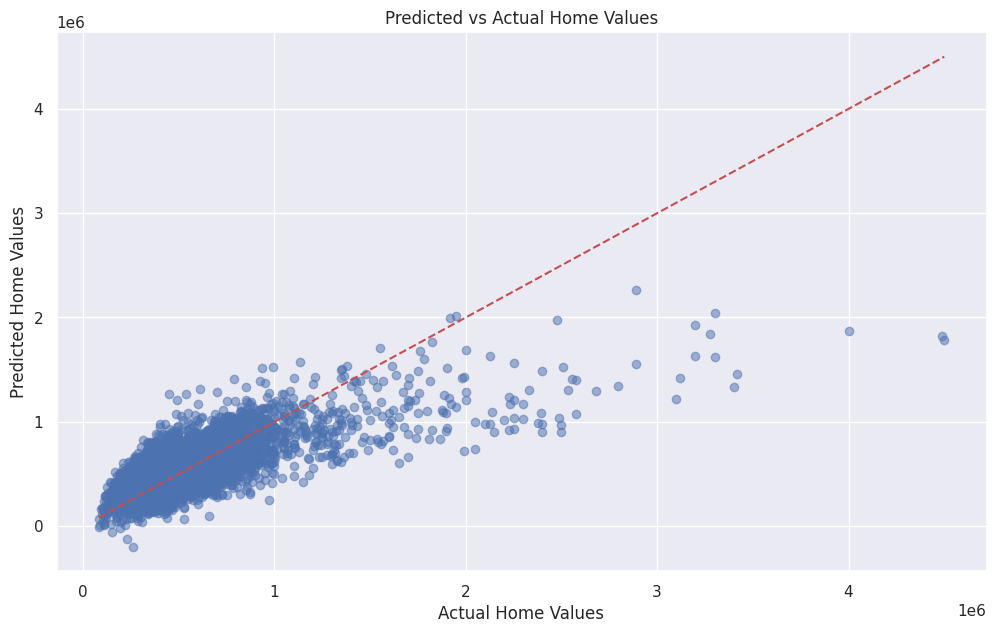

R2 = 0.55


In [34]:
from sklearn.preprocessing import StandardScaler

X = housing_df[['bathrooms', 'sqft_living','grade']]
y = housing_df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.transform(X_train)
X_scaled_test  = ss.transform(X_test)

model_LinReg = LinearRegression()
model_LinReg.fit(X_scaled_train, y_train)

plt.figure(figsize=(12, 7))
plt.scatter(y_test, model_LinReg.predict(X_scaled_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Home Values')
plt.ylabel('Predicted Home Values')
plt.title('Predicted vs Actual Home Values')
plt.show()

print(f'R2 = {model_LinReg.score(X_scaled_test, y_test):.2f}')

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

#### Your written answers here
Which features are you using and why?
 
 - I am using the same features as the previous model with the dropped price date and zip

R^2 for Ridge: 0.69
Top 3 most important features: Index(['lat', 'sqft_living', 'grade'], dtype='object')


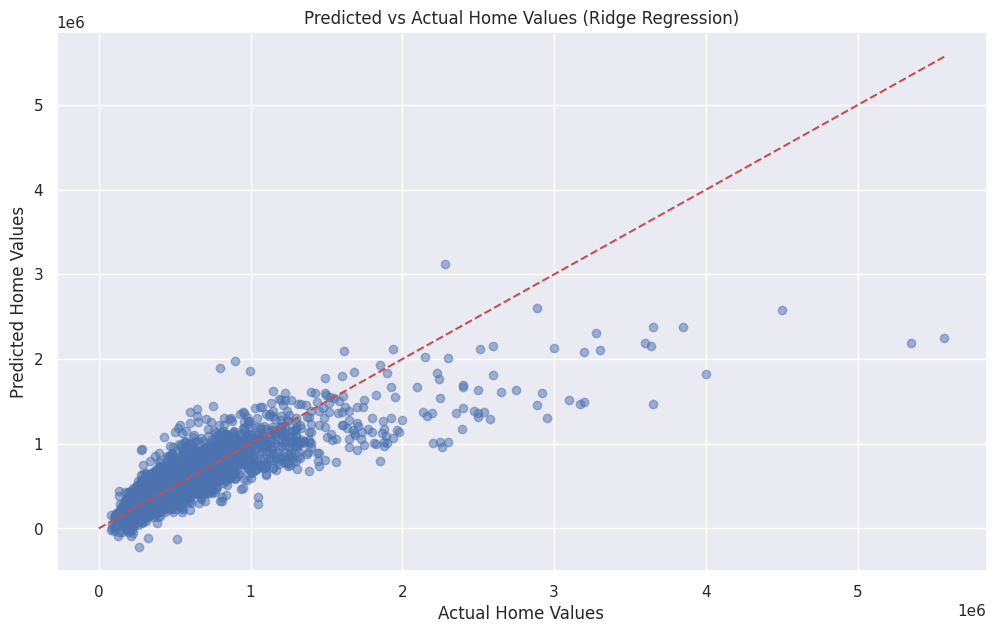

In [35]:
X_all = housing_df.drop(columns=['price'])
y = housing_df['price']

feature_names = X_all.columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

alpha_value = 1000
ridge = Ridge(alpha=alpha_value)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'R^2 for Ridge: {r2_ridge:.2f}')

coef_sorted = np.argsort(np.abs(ridge.coef_))[-3:]
top_features = feature_names[coef_sorted]
print("Top 3 most important features:", top_features)

plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.xlabel("Actual Home Values")
plt.ylabel("Predicted Home Values")
plt.title("Predicted vs Actual Home Values (Ridge Regression)")
plt.show()


### Your written answers here
Which regression did you use?
 - Lasso

Does your regularized model look better than your MLR? How so?
 - Yes, the $R^2$ is higher. It is very hard to tell visually though.

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

R² for homes under $1M: 0.69
R² for homes over $1M: 0.51


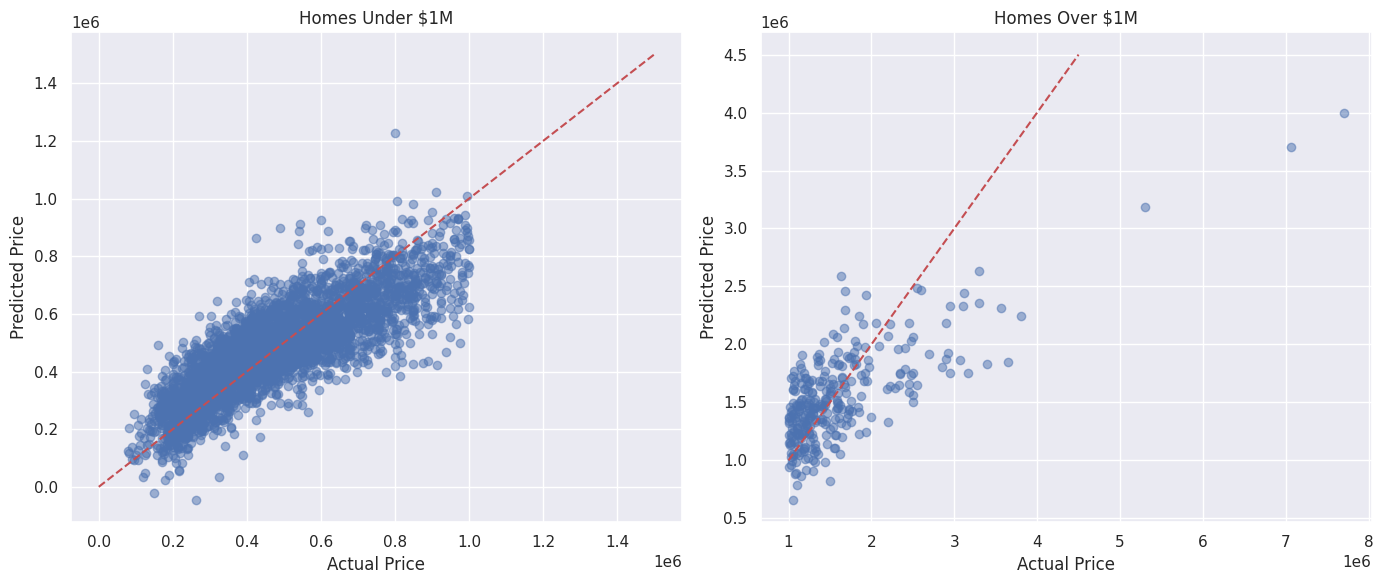

In [55]:
X = housing_df.drop(columns=['price'])
y = housing_df['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

separator = y < 1_000_000
X_under_1M, y_under_1M = X_scaled[separator], y[separator]
X_over_1M, y_over_1M = X_scaled[~separator], y[~separator]

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under_1M, y_under_1M, test_size=0.2, random_state=42)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over_1M, y_over_1M, test_size=0.2, random_state=42)

ridge_under = Ridge(alpha=500)
ridge_over = Ridge(alpha=500)

ridge_under.fit(X_train_under, y_train_under)
ridge_over.fit(X_train_over, y_train_over)

y_pred_under = ridge_under.predict(X_test_under)
y_pred_over = ridge_over.predict(X_test_over)

r2_under = ridge_under.score(X_test_under, y_test_under)
r2_over = ridge_over.score(X_test_over, y_test_over)

print(f'R² for homes under $1M: {r2_under:.2f}')
print(f'R² for homes over $1M: {r2_over:.2f}')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(y_test_under, y_pred_under, alpha=0.5)
axes[0].plot([0, 1_500_000], [0, 1_500_000], 'r--')
axes[0].set_title('Homes Under $1M')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')

axes[1].scatter(y_test_over, y_pred_over, alpha=0.5)
axes[1].plot([1_000_000, 4_500_000], [1_000_000, 4_500_000], 'r--')
axes[1].set_title('Homes Over $1M')
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')

plt.tight_layout()
plt.show()

 ### Your written answers here

 What are the $R^2$ for the two models?
 - $R^2$ for homes under $1M: 0.69
 - $R^2$ for homes over $1M: 0.51
 
